PCLab#5 - Group 2 - Emanuele Sala, Luca Soleri, Fabio Stefana

<div style="border: 4px solid #007bff; padding: 10px; background-color: #e9f5ff; border-radius: 5px;">
    <h1 style="color: #007bff;">Importing libraries and Dataset</h1>
</div>


In [1]:
import pandas as pd
import os
import gc

In [58]:
directory = "data/sigwatch_data"
df_list = []

for file in os.listdir(directory):
    if file.endswith(".dta"):
        file_path = os.path.join(directory, file)
        temp_df = pd.read_stata(file_path)
        df_list.append(temp_df)
        
df = pd.concat(df_list, ignore_index=True)

<div style="border: 4px solid #007bff; padding: 10px; background-color: #e9f5ff; border-radius: 5px;">
    <h1 style="color: #007bff;">Preliminary data exploration</h1>
</div>

In [62]:
# With this filter we keep only the banks
df = df[df["corp_industry_sector1"] == "Finance"]

In [63]:
# And with this filter we only keep the countries form the US, UK or EU
countries = ['Austria',
             'US',
             'Denmark',
             'UK',
             'Germany',
             'Luxembourg',
             'France',
             'Italy',
             'Netherlands',
             'Belgium',
             'Sweden',
             'Spain',
             'Ireland',
             'Portugal',
             'Poland',
             'Finland',
             'USA',
             'Croatia',
             'Bulgaria',
             'Montenegro',
             'Bosnia and Herzegovina']

df = df[df['country_corp'].isin(countries)]

In [ ]:
# We count the unique number of ud_archive as some have more than one row but still count as one isngle campaing
n_of_campaigns = len(list(df["uid_archive"].unique()))
print(f"There are {n_of_campaigns} unique campaigns for US UK and EU banks")

In [ ]:
list_of_ngo_columns = []
for i in range(5):
    i = i+1
    ngo_column_number = f"ngo_name{i}"
    ngo_col = list(df[ngo_column_number])
    list_of_ngo_columns += ngo_col
unique_ngos = list(set(list_of_ngo_columns))

# we do -1 because we have to account for the null value
print(f"There are {len(unique_ngos) - 1} unique NGO organizations involved in this dataset")

In [ ]:
# Numero di aziende targettate

In [ ]:
len(df)

In [ ]:
columns_we_want = ["uid_archive", 
                   "date", 
                   "company",
                   'country_corp', # Country of the Company
                   'corp_industry_sector1', # Industry of the company
                   'company_parent',
                   'company_parent_country',
                   "sentiment",
                   'issue_name1',
                   'issue_name2',
                   'issue_name3']

<div style="border: 4px solid #007bff; padding: 10px; background-color: #e9f5ff; border-radius: 5px;">
    <h1 style="color: #007bff;">Day 2: Exploring bank data</h1>
</div>

In [2]:
def read_banks(directory):
    # banks_ri.xlsm has the total return for each bank
    banks = pd.ExcelFile(directory)
    # Each workbook is divided into sheets that divide the banks into different countires
    # the first sheet is a request table so we will ignore it
    bank_sheets = banks.sheet_names[1:]
    first_df = banks.parse(bank_sheets[0])
    first_df = first_df.rename(columns={first_df.columns[0]: "Date"})
    other_dfs = [banks.parse(sheet_name).iloc[:, 1:] for sheet_name in bank_sheets[1:]]
    banks_df = pd.concat([first_df] + other_dfs, axis=1)
    return banks_df

def clean_banks_ri(banks_ri_df):
    # Rename columns so that they have cleaner names
    rename_dict = {"Date": "Date"}
    for col in banks_ri_df.columns[1:]:
        rename_dict[col] = col[:-17] + "_TR"
    banks_ri_df.rename(columns=rename_dict, inplace=True)
    # As we have 158 banks, we will drop all the banks that are marked as Dead, this is a simple 
    # solution around this problem and we are only doing this because we can afford to do so 
    # seeing how many banks we have. 
    # With this operation we will be dropping only 3 banks.
    dead_banks = []
    for col in banks_ri_df.columns[1:]:
        if "dead" in col.lower():
            dead_banks.append(col)
    banks_ri_df.drop(dead_banks, axis = 1, inplace = True)
    return banks_ri_df

banks_ri_df = read_banks("data/banks_data_bocconi/banks_ri.xlsm")
banks_ri_df = clean_banks_ri(banks_ri_df)
banks_ri_df.head(5)

,Date,AAREAL BANK_TR,COMDIRECT BANK_TR,COMMERZBANK_TR,DT.PFANDBRIEFBANK_TR,PROCREDIT HOLDING_TR,UMWELTBANK_TR,ALLIANZ_TR,DEUTSCHE BANK_TR,BANQUE NATIONALE DE BELGIQUE_TR,...,VIRGIN MONEY UK_TR,HSBC HOLDINGS_TR,LLOYDS BANKING GROUP_TR,METRO BANK_TR,ROYAL BANK OF SCTL.GP._TR,STANDARD CHARTERED_TR,TBC BANK GROUP_TR,ADMIRAL GROUP_TR,ALLIANCE TRUST_TR,SAGA GROUP_TR
0,2008-01-01,182.27,33.09,974.59,NaN,NaN,260.15,3364.43,1937.46,2658.11,...,NaN,1502.17,271.20,NaN,82190.06,79476.00,NaN,449.44,14717.18,1438.33
1,2008-01-02,183.81,33.05,956.43,NaN,NaN,259.22,3304.22,1900.87,2684.50,...,NaN,1489.68,269.47,NaN,81079.38,79001.88,NaN,447.39,14764.00,1438.33
2,2008-01-03,181.73,33.05,944.94,NaN,NaN,261.69,3285.59,1900.00,2682.82,...,NaN,1495.93,270.91,NaN,81912.38,78657.13,NaN,449.44,14866.32,1438.33
3,2008-01-04,173.31,33.09,939.75,NaN,NaN,263.24,3220.61,1881.60,2641.91,...,NaN,1476.30,261.43,NaN,78348.94,77665.81,NaN,436.36,14538.91,1438.33
4,2008-01-07,167.91,33.20,943.08,NaN,NaN,259.37,3179.94,1880.52,2632.54,...,NaN,1486.11,259.71,NaN,77423.38,77924.38,NaN,431.87,14549.14,1438.33


The banks_ri dataset provides the Total Return Index, this includes both price changes and the effect of dividends reinvested back into the stock. If the bank pays dividends, these dividends are considered to be reinvested, adding to the growth of the index. 

This index provides a more comprehensive view of the stock’s overall return by including income from dividends, making it useful for capturing the full picture of what an investor earns from holding the stock.

In [3]:
def clean_banks_pi(banks_pi_df):
    rename_dict = {"Date": "Date"}
    for col in banks_pi_df.columns[1:]:
        rename_dict[col] = col[:-14] + "_PI"
    banks_pi_df.rename(columns=rename_dict, inplace=True)
    dead_banks = []
    for col in banks_pi_df.columns[1:]:
        if "dead" in col.lower():
            dead_banks.append(col)
    banks_pi_df.drop(dead_banks, axis = 1, inplace = True)
    return banks_pi_df

banks_pi_df = read_banks("data/banks_data_bocconi/banks_pi.xlsm")
banks_pi_df = clean_banks_pi(banks_pi_df)
banks_pi_df.head(5)

,Date,AAREAL BANK_PI,COMDIRECT BANK_PI,COMMERZBANK_PI,DT.PFANDBRIEFBANK_PI,PROCREDIT HOLDING_PI,UMWELTBANK_PI,ALLIANZ_PI,DEUTSCHE BANK_PI,BANQUE NATIONALE DE BELGIQUE_PI,...,CLOSE BROTHERS GROUP_PI,VIRGIN MONEY UK_PI,HSBC HOLDINGS_PI,LLOYDS BANKING GROUP_PI,METRO BANK_PI,ROYAL BANK OF SCTL.GP._PI,STANDARD CHARTERED_PI,ADMIRAL GROUP_PI,ALLIANCE TRUST_PI,SAGA GROUP_PI
0,2008-01-01,171.1,27.2,353.5,NaN,NaN,224.0,2132.9,802.2,714.9,...,8202.5,NaN,784.5,137.4,NaN,11418.8,8372.5,400.0,3044.2,854.3
1,2008-01-02,172.6,27.1,346.9,NaN,NaN,223.2,2094.8,787.1,722.0,...,8198.2,NaN,778.0,136.5,NaN,11264.5,8322.5,398.2,3037.9,854.3
2,2008-01-03,170.6,27.1,342.7,NaN,NaN,225.3,2082.9,786.7,721.5,...,8202.5,NaN,781.2,137.3,NaN,11380.3,8286.2,400.0,3059.0,854.3
3,2008-01-04,162.7,27.2,340.8,NaN,NaN,226.7,2041.8,779.1,710.5,...,8332.0,NaN,771.0,132.5,NaN,10885.2,8181.8,388.4,2991.6,854.3
4,2008-01-07,157.7,27.3,342.1,NaN,NaN,223.3,2016.0,778.7,708.0,...,8336.3,NaN,776.1,131.6,NaN,10756.6,8209.0,384.4,2993.7,854.3


NOTE: The banks_pi dataset contains 3 more banks than the banks_pi dataset, those banks are all 3 located in Austria and they are:
- ERSTE GROUP BANK
- RAIFFEISEN BANK INTL
- VOLKSBANK VBG.PARTN.

On the other hand, the banks_pi dataset contains the Price Index, which only reflects a stock’s price movements without accounting for dividends or other distributions. It provides a pure measure of price appreciation, capturing changes in the stock's market price alone. 

This makes it more suitable for CAPM estimation, as we are focused on price shifts rather than the total return an investor would earn if they held the stock and reinvested dividends.

<strong>To clarify, we'll now rely exclusively on the banks_pi dataset to carry out our analysis.</strong>

<div style="border: 4px solid #007bff; padding: 10px">
    <h3 style="color: #007bff;">Now we load the Fama-French info</h1>
</div>

In [4]:
# First we get the start and end date of our bank data
start = banks_pi_df["Date"].iloc[0]
end = banks_pi_df["Date"].iloc[-1]

# And now we can read in the Factors and keep only the days we need
EU_FF = pd.read_excel("data/banks_data_bocconi/Europe_3_Factors_Daily.xlsx")
EU_FF['date'] = pd.to_datetime(EU_FF['date'], format="%m/%d/%Y")
EU_FF = EU_FF[(EU_FF["date"] >= start) & (EU_FF["date"] <= end)]
rename_dict_EU = {"date": "date"}
for col in EU_FF.columns[1:]:
    rename_dict_EU[col] = col + "_EU"
EU_FF.rename(columns=rename_dict_EU, inplace=True)

US_FF = pd.read_excel("data/banks_data_bocconi/North_America_3_Factors_Daily.xlsx")
US_FF['date'] = pd.to_datetime(US_FF['date'], format="%m/%d/%Y")
US_FF = US_FF[(US_FF["date"] >= start) & (US_FF["date"] <= end)]
US_FF.drop("date", axis = 1, inplace = True)
rename_dict_US = {}
for col in US_FF.columns:
    rename_dict_US[col] = col + "_US"
US_FF.rename(columns=rename_dict_US, inplace=True)

FF = pd.concat([EU_FF, US_FF], axis = 1)
FF.reset_index(drop = True, inplace = True)

# Now we calculate the market return, as we have (rm -rf) and rf its quite simple
FF["MKT_EU"] = FF["Mkt-RF_EU"] - FF["RF_EU"]
FF["MKT_US"] = FF["Mkt-RF_US"] - FF["RF_US"]

print(f"Banks_pi length: {len(banks_pi_df)}")
print(f"Banks_pi length: {len(FF)}")
FF

Banks_pi length: 3216
Banks_pi length: 3216


,date,Mkt-RF_EU,SMB_EU,HML_EU,RF_EU,Mkt-RF_US,SMB_US,HML_US,RF_US,MKT_EU,MKT_US
0,2008-01-01,0.02,0.00,0.00,0.01,0.04,0.05,0.01,0.01,0.01,0.03
1,2008-01-02,-0.11,0.94,0.23,0.01,-1.25,0.09,-0.22,0.01,-0.12,-1.26
2,2008-01-03,-0.13,-0.22,0.11,0.01,-0.03,-0.66,-0.42,0.01,-0.14,-0.04
3,2008-01-04,-1.74,0.39,0.30,0.01,-2.59,-0.45,0.29,0.01,-1.75,-2.60
4,2008-01-07,-0.79,-1.03,0.16,0.01,0.02,-0.22,0.24,0.01,-0.80,0.01
...,...,...,...,...,...,...,...,...,...,...,...
3211,2020-04-22,1.29,-0.77,0.11,0.00,2.27,-0.45,-1.10,0.00,1.29,2.27
3212,2020-04-23,0.42,0.66,0.92,0.00,0.13,1.03,0.54,0.00,0.42,0.13
3213,2020-04-24,-0.33,0.40,-0.37,0.00,1.40,0.35,-0.33,0.00,-0.33,1.40
3214,2020-04-27,1.89,-0.58,0.44,0.00,1.75,1.90,1.37,0.00,1.89,1.75


<div style="border: 4px solid #007bff; padding: 10px">
    <h3 style="color: #007bff;">Now we calculate the daily returns for each bank</h1>
</div>

In [5]:
def calculate_return(stock, returns_df):
    shifted = returns_df[stock].shift(1)
    return_series = (returns_df[stock] - shifted) / shifted
    return return_series.rename(f"{stock}_r")

returns_dict = {}

tickers = banks_pi_df.columns[1:]
for stock in tickers:
    returns_dict[f"{stock}_r"] = calculate_return(stock, banks_pi_df)

returns_df = pd.concat(returns_dict.values(), axis=1)

<div style="border: 4px solid #007bff; padding: 10px">
    <h3 style="color: #007bff;">Now we put everything togheter into a single panel</h1>
</div>

In [6]:
bank_data = pd.concat([banks_pi_df, returns_df, FF], axis=1)
bank_data

,Date,AAREAL BANK_PI,COMDIRECT BANK_PI,COMMERZBANK_PI,DT.PFANDBRIEFBANK_PI,PROCREDIT HOLDING_PI,UMWELTBANK_PI,ALLIANZ_PI,DEUTSCHE BANK_PI,BANQUE NATIONALE DE BELGIQUE_PI,...,Mkt-RF_EU,SMB_EU,HML_EU,RF_EU,Mkt-RF_US,SMB_US,HML_US,RF_US,MKT_EU,MKT_US
0,2008-01-01,171.1,27.2,353.5,NaN,NaN,224.0,2132.9,802.2,714.9,...,0.02,0.00,0.00,0.01,0.04,0.05,0.01,0.01,0.01,0.03
1,2008-01-02,172.6,27.1,346.9,NaN,NaN,223.2,2094.8,787.1,722.0,...,-0.11,0.94,0.23,0.01,-1.25,0.09,-0.22,0.01,-0.12,-1.26
2,2008-01-03,170.6,27.1,342.7,NaN,NaN,225.3,2082.9,786.7,721.5,...,-0.13,-0.22,0.11,0.01,-0.03,-0.66,-0.42,0.01,-0.14,-0.04
3,2008-01-04,162.7,27.2,340.8,NaN,NaN,226.7,2041.8,779.1,710.5,...,-1.74,0.39,0.30,0.01,-2.59,-0.45,0.29,0.01,-1.75,-2.60
4,2008-01-07,157.7,27.3,342.1,NaN,NaN,223.3,2016.0,778.7,708.0,...,-0.79,-1.03,0.16,0.01,0.02,-0.22,0.24,0.01,-0.80,0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,2020-04-22,86.6,41.4,6.9,60.5,36.7,830.9,2331.4,65.2,467.6,...,1.29,-0.77,0.11,0.00,2.27,-0.45,-1.10,0.00,1.29,2.27
3212,2020-04-23,85.4,42.1,7.1,60.2,37.0,827.5,2283.0,66.9,472.2,...,0.42,0.66,0.92,0.00,0.13,1.03,0.54,0.00,0.42,0.13
3213,2020-04-24,86.7,41.9,7.0,59.2,37.3,807.1,2271.8,63.8,465.3,...,-0.33,0.40,-0.37,0.00,1.40,0.35,-0.33,0.00,-0.33,1.40
3214,2020-04-27,86.8,42.2,7.4,61.5,38.3,790.2,2316.1,71.0,465.3,...,1.89,-0.58,0.44,0.00,1.75,1.90,1.37,0.00,1.89,1.75


In [7]:
type(bank_data["Date"][0])

pandas._libs.tslibs.timestamps.Timestamp

<div style="border: 4px solid #007bff; padding: 10px; background-color: #e9f5ff; border-radius: 5px;">
    <h1 style="color: #007bff;">Task 4: Estimating the CAPM </h1>
</div>

In [8]:
us_banks = []
banks_pi = pd.ExcelFile("data/banks_data_bocconi/banks_ri.xlsm")
us_banks_raw = list(banks_pi.parse("US").columns)[1:]
for bank in us_banks_raw:
    us_banks.append(bank[:-17] + "_PI_r")
us_banks = [bank for bank in us_banks if "DEAD" not in bank]
# Delete banks_pi and us_banks_raw to free memory
del banks_pi, us_banks_raw
gc.collect()

3847

In [9]:
us_banks

['BANK OF AMERICA_PI_r',
 'TRUIST FINANCIAL_PI_r',
 'BOK FINL._PI_r',
 'CIT GROUP_PI_r',
 'CITIZENS FINANCIAL GROUP_PI_r',
 'COMERICA_PI_r',
 'COMMERCE BCSH._PI_r',
 'CREDICORP_PI_r',
 'CULLEN FO.BANKERS_PI_r',
 'DISCOVER FINANCIAL SVS._PI_r',
 'EAST WEST BANCORP_PI_r',
 'FIFTH THIRD BANCORP_PI_r',
 'FIRST CTZN.BCSH.A_PI_r',
 'FIRST FINL.BKSH._PI_r',
 'FIRST HORIZON NATIONAL_PI_r',
 'FIRST REPUBLIC BANK_PI_r',
 'FNB_PI_r',
 'HUNTINGTON BCSH._PI_r',
 'IBERIABANK_PI_r',
 'KEYCORP_PI_r',
 'M&T BANK_PI_r',
 'NEW YORK COMMUNITY BANCORP_PI_r',
 'PACWEST BANCORP_PI_r',
 'PEOPLES UNITED FINANCIAL_PI_r',
 'PINNACLE FINANCIAL PTNS._PI_r',
 'PNC FINL.SVS.GP._PI_r',
 'POPULAR_PI_r',
 'PROSPERITY BCSH._PI_r',
 'REGIONS FINL.NEW_PI_r',
 'SIGNATURE BANK_PI_r',
 'STERLING BANCORP_PI_r',
 'SVB FINANCIAL GROUP_PI_r',
 'SYNOVUS FINANCIAL_PI_r',
 'TCF FINANCIAL_PI_r',
 'TFS FINANCIAL_PI_r',
 'TRISTATE CAPITAL HOLDINGS DS_PI_r',
 'UNITED BANKSHARES_PI_r',
 'US BANCORP_PI_r',
 'WEBSTER FINANCIAL_PI_r',
 'WE

In [10]:
task4_cols = ["Date", "Mkt-RF_US", "Mkt-RF_EU"]

for col in bank_data.columns:
    if col.endswith("_r"):
        task4_cols.append(col)

task4_data = bank_data[task4_cols].copy()
task4_data.columns

Index(['Date', 'Mkt-RF_US', 'Mkt-RF_EU', 'AAREAL BANK_PI_r',
       'COMDIRECT BANK_PI_r', 'COMMERZBANK_PI_r', 'DT.PFANDBRIEFBANK_PI_r',
       'PROCREDIT HOLDING_PI_r', 'UMWELTBANK_PI_r', 'ALLIANZ_PI_r',
       ...
       'CLOSE BROTHERS GROUP_PI_r', 'VIRGIN MONEY UK_PI_r',
       'HSBC HOLDINGS_PI_r', 'LLOYDS BANKING GROUP_PI_r', 'METRO BANK_PI_r',
       'ROYAL BANK OF SCTL.GP._PI_r', 'STANDARD CHARTERED_PI_r',
       'ADMIRAL GROUP_PI_r', 'ALLIANCE TRUST_PI_r', 'SAGA GROUP_PI_r'],
      dtype='object', length=160)

Now we will estimate the CAPM on a rolling window we decided to use 130 days (as there are about 130 working days in 6 months)as a window

In [11]:
import statsmodels.api as sm

def get_mkt_data(bank_data, bank, us_banks):
    if bank in us_banks:
        mkt_data = bank_data["Mkt-RF_US"].copy()
    else:
        mkt_data = bank_data["Mkt-RF_EU"].copy()
    return mkt_data

def rollin_window_CAPM(bank_data, bank, us_banks, window_size = 130):
    current_bank = bank_data[["Date", f"{bank}"]].copy()
    mkt_data = get_mkt_data(bank_data, bank, us_banks)
    current_bank["MKT"] = mkt_data

    P_values = pd.DataFrame()
    alphas = []
    betas = []
    # Iterate using sliding window approach
    for i in range(len(current_bank) - window_size + 1):
        window = current_bank.iloc[i:i + window_size] 

        # Add a constant term (intercept) to the regression model, this will be our Alpha
        X = sm.add_constant(window["MKT"])  
        y = window[bank] 
        
        # Fit the OLS regression
        model = sm.OLS(y, X).fit()  
    
        # Extract parameter of intrest
        alpha = model.params.iloc[0]
        beta = model.params.iloc[1]
        p_value_alpha = model.pvalues.iloc[0]
        p_value_beta = model.pvalues.iloc[1]
    
        # Create a dictionary to store the results for the current stock
        result_i = {"Alpha": alpha,
                    "Beta": beta,
                    "P Value Alpha": p_value_alpha,
                    "P Value Beta": p_value_beta}
        betas.append(beta)
        alphas.append(alpha)
         
        result_df = pd.DataFrame(result_i, index=[i])  
        P_values = pd.concat([P_values, result_df]) 
    P_values.reset_index(inplace = True)
    P_values.rename(columns={'index': 'Stock'}, inplace = True)
    return P_values, betas, alphas
    

In [12]:
%%time
from tqdm import tqdm

CAPM_results = {}
betas_dic = {}
alphas_dic = {}
for bank_i in tqdm(task4_data.columns[3:]):
    P_values, betas_i, alpha_i = rollin_window_CAPM(task4_data, bank_i, us_banks)
    CAPM_results[bank_i] = P_values
    betas_dic[bank_i] = betas_i
    alphas_dic[bank_i] = alpha_i
    
alphas_df = pd.DataFrame(alphas_dic)
betas_df = pd.DataFrame(betas_dic)

100%|██████████| 157/157 [04:41<00:00,  1.80s/it]

CPU times: user 4min 40s, sys: 1.82 s, total: 4min 42s
Wall time: 4min 42s


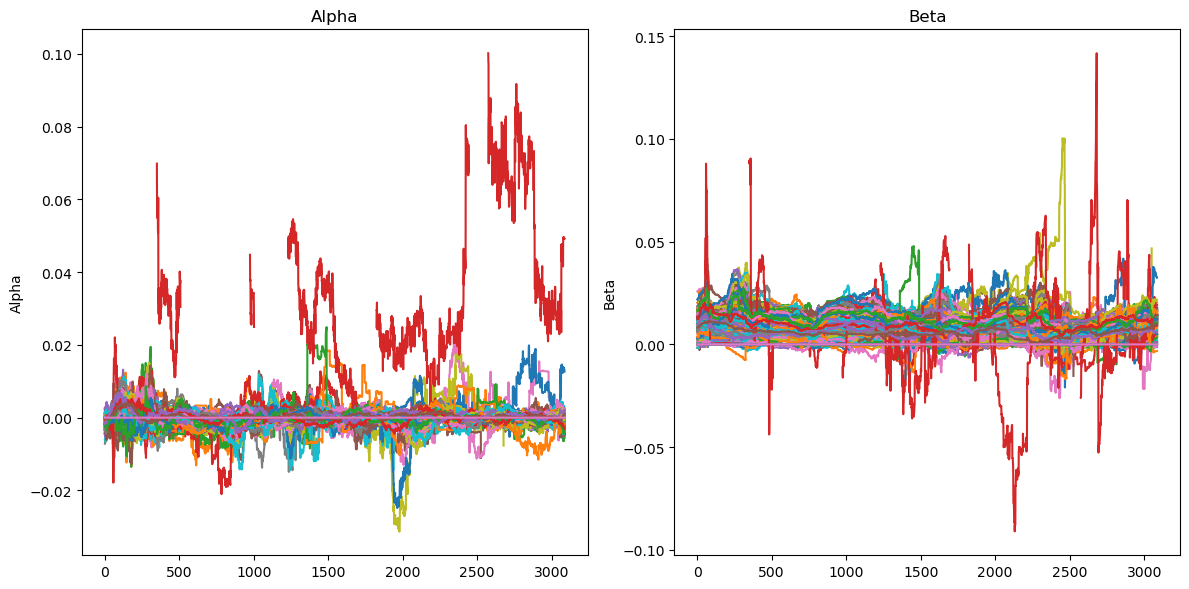

In [13]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize=(12, 6))  # Create a 1x2 grid for subplots

for key, value in CAPM_results.items():
    axs[0].plot(value["Stock"], value["Alpha"])

for col in betas_df.columns:
    axs[1].plot(betas_df.index, betas_df[col])
        
axs[1].set_title("Beta")
axs[1].set_ylabel("Beta")

axs[0].set_title("Alpha")
axs[0].set_ylabel("Alpha")

plt.tight_layout()  # Adjust spacing to prevent overlap

In [14]:
betas_df["us_banks"] = betas_df[us_banks].mean(axis=1)
betas_df["eu_uk_banks"] = betas_df[betas_df.columns.difference(us_banks)].mean(axis=1)

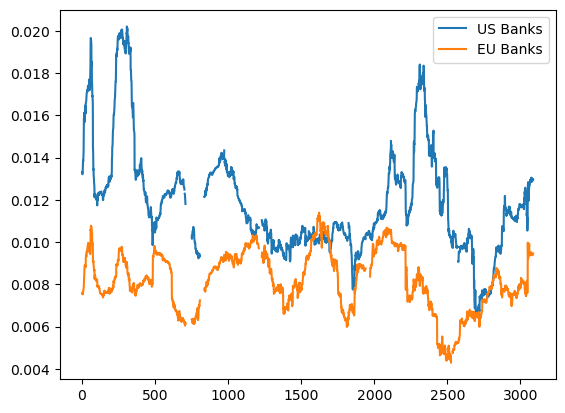

In [15]:
plt.plot(betas_df.index, betas_df["us_banks"], label="US Banks")
plt.plot(betas_df.index, betas_df["eu_uk_banks"], label="EU Banks")
plt.legend()

<div style="border: 4px solid #007bff; padding: 10px; background-color: #e9f5ff; border-radius: 5px;">
    <h1 style="color: #007bff;">Task 5 : compute CARs and merge Sigwatch + Datastream data</h1>
</div>

In [75]:
task5_data = task4_data
first_day_posible_CAR = task5_data.iloc[300]["Date"]
task5_data

,Date,Mkt-RF_US,Mkt-RF_EU,AAREAL BANK_PI_r,COMDIRECT BANK_PI_r,COMMERZBANK_PI_r,DT.PFANDBRIEFBANK_PI_r,PROCREDIT HOLDING_PI_r,UMWELTBANK_PI_r,ALLIANZ_PI_r,...,CLOSE BROTHERS GROUP_PI_r,VIRGIN MONEY UK_PI_r,HSBC HOLDINGS_PI_r,LLOYDS BANKING GROUP_PI_r,METRO BANK_PI_r,ROYAL BANK OF SCTL.GP._PI_r,STANDARD CHARTERED_PI_r,ADMIRAL GROUP_PI_r,ALLIANCE TRUST_PI_r,SAGA GROUP_PI_r
0,2008-01-01,0.04,0.02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2008-01-02,-1.25,-0.11,0.008767,-0.003676,-0.018670,NaN,NaN,-0.003571,-0.017863,...,-0.000524,NaN,-0.008286,-0.006550,NaN,-0.013513,-0.005972,-0.004500,-0.002070,0.0
2,2008-01-03,-0.03,-0.13,-0.011587,0.000000,-0.012107,NaN,NaN,0.009409,-0.005681,...,0.000525,NaN,0.004113,0.005861,NaN,0.010280,-0.004362,0.004520,0.006946,0.0
3,2008-01-04,-2.59,-1.74,-0.046307,0.003690,-0.005544,NaN,NaN,0.006214,-0.019732,...,0.015788,NaN,-0.013057,-0.034960,NaN,-0.043505,-0.012599,-0.029000,-0.022033,0.0
4,2008-01-07,0.02,-0.79,-0.030731,0.003676,0.003815,NaN,NaN,-0.014998,-0.012636,...,0.000516,NaN,0.006615,-0.006792,NaN,-0.011814,0.003324,-0.010299,0.000702,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,2020-04-22,2.27,1.29,0.001156,-0.018957,0.000000,0.004983,0.000000,0.004109,-0.006393,...,0.017571,-0.002882,0.015695,0.029240,-0.060000,0.018689,0.003383,0.013304,0.018910,0.0
3212,2020-04-23,0.13,0.42,-0.013857,0.016908,0.028986,-0.004959,0.008174,-0.004092,-0.020760,...,0.022042,0.028902,0.011762,0.017045,-0.021277,0.016480,0.023783,-0.002168,0.004292,0.0
3213,2020-04-24,1.40,-0.33,0.015222,-0.004751,-0.014085,-0.016611,0.008108,-0.024653,-0.004906,...,-0.021567,-0.014045,-0.019831,-0.022346,-0.021739,-0.017131,-0.039785,0.013158,-0.009949,0.0
3214,2020-04-27,1.75,1.89,0.001153,0.007160,0.057143,0.038851,0.026810,-0.020939,0.019500,...,-0.015346,0.079772,0.035116,0.022857,0.044444,0.027700,0.018039,-0.009532,0.031598,0.0


In [55]:
def calculate_CAR(task5_data, bank, us_banks, target_day):
    current_bank = task5_data[["Date", f"{bank}"]].copy()
    mkt_data = get_mkt_data(bank_data, bank, us_banks)
    current_bank["MKT"] = mkt_data
    td_index = current_bank[current_bank["Date"] == target_day].index[0]
    
    past_data = current_bank.iloc[td_index - 300 : td_index - 50]
    today_plus_minus_10 = current_bank.iloc[td_index - 10 : td_index + 10].copy()
    # Add a constant term (intercept) to the regression model, this will be our Alpha
    X = sm.add_constant(past_data["MKT"])  
    y = past_data[bank] 
    
    # Fit the OLS regression
    model = sm.OLS(y, X).fit()
    alpha = model.params.iloc[0]
    beta = model.params.iloc[1]

    today_plus_minus_10[f"{bank}_hat"] = alpha + beta * today_plus_minus_10["MKT"]
    today_plus_minus_10["Abnormal Return"] = today_plus_minus_10[f"{bank}"] - today_plus_minus_10[f"{bank}_hat"]
    all_ARs = list(today_plus_minus_10["Abnormal Return"])
    return sum(all_ARs)

In [56]:
calculate_CAR(task5_data, "AAREAL BANK_PI_r", us_banks, pd.Timestamp("2020-04-22"))

-0.10215357195452669

In [70]:
df.reset_index(inplace = True, drop = True)
df["date"] = pd.to_datetime(df["date"], format="%Y-%m-%d")
df = df[df["date"] > first_day_posible_CAR]

In [126]:
import re

l1 = sorted(df["company"].unique())
print(len(l1))
l1 = [item.lower() for item in l1]
l1 = [re.sub(r'[^a-zA-Z0-9\s]', '', item) for item in l1]

l2 = list(task5_data.columns)[3:]
l2 = [item.replace('_PI_r', '') for item in l2]
l2 = [item.lower() for item in l2]
l2 = [re.sub(r'[^a-zA-Z0-9\s]', '', item) for item in l2]

815


In [94]:
l2 = list(task5_data.columns)[3:]
l2 = [item.replace('_PI_r', '') for item in l2]
l2 = [item.lower() for item in l2]
l2 = [re.sub(r'[^a-zA-Z0-9\s]', '', item) for item in l2]

def find_matches_split_l2(l1, l2):
    matches = {}
    for ref_item in l1:
        for orig_item in l2:
            if orig_item in ref_item:
                matches[ref_item] = orig_item
                break
        if ref_item not in matches:
            matches[ref_item] = None
    return matches

matched_pairs = find_matches_split_l2(l1, l2)
pollo = pd.DataFrame({"Sigwatch": matched_pairs.keys(),
                      "Banks Datastream": matched_pairs.values()})

In [122]:
def find_matches_split_l2(l1, l2):
    matches = {}

    for ref_item in l1:
        for orig_item in l2:
            if orig_item in ref_item:
                matches[ref_item] = orig_item
                break  # Stop looking through l2 once a match is found

        # If no match is found, assign None or any placeholder you want
        if ref_item not in matches:
            matches[ref_item] = None

    return matches

# Test example
l1l = ["hello world", "ciao"]
l2l = ["hello"]
matched_pairs = find_matches_split_l2(l1, l2)
pollo = pd.DataFrame({"Sigwatch": matched_pairs.keys(),
                      "Banks Datastream": matched_pairs.values()})

In [125]:
pollo.dropna().reset_index(drop = True)

,Sigwatch,Banks Datastream
0,abn amro bank nv,abn amro bank
1,asr nederland,asr nederland
2,admiral group,admiral group
3,aegon,aegon
4,aegon asset management,aegon
5,aegon bank,aegon
6,aegon uk,aegon
7,aflac,aflac
8,alliance trust,alliance trust
9,allianz global investors,allianz


In [109]:
from rapidfuzz import process

def find_matches_fuzzy(l1, l2, threshold=80):
    matches = {}

    # Loop over each item in l2 (reference list)
    for ref_item in l1:
        # Split the ref_item into words
        ref_words = ref_item.split()
        
        best_match = None
        best_score = 0
        
        # Check fuzzy match for each word in ref_words against all items in l1
        for orig_item in l2:
            for word in ref_words:
                # Get the fuzzy match score between the word and item from l1
                score = process.extractOne(word, [orig_item])[1]
                if score > best_score:
                    best_score = score
                    best_match = orig_item

        # Only keep matches with a score above the threshold
        if best_score >= threshold:
            matches[ref_item] = best_match
        else:
            matches[ref_item] = None

    return matches

# Run the function and print results
matched_pairs_fuzzy = find_matches_fuzzy(l1, l2)

In [110]:
matched_pairs_fuzzy

{'247moneyboxcom': None,
 '3i': None,
 'aa insurance': 'aareal bank',
 'abn amro bank nv': 'aareal bank',
 'abn amro pensioenfonds': 'abn amro bank',
 'ace cash express': 'american express',
 'aecid spanish agency for international development cooperation': None,
 'agipi': None,
 'aima': None,
 'amf': None,
 'ant trust  corporate services': 'banco santander',
 'ap pension': None,
 'apg': None,
 'arag rechtsbijstand': None,
 'asn bank ': 'aareal bank',
 'asr nederland': 'asr nederland',
 'atp': None,
 'avs meerkerk': None,
 'axa': None,
 'axa belgium': None,
 'axa uk life': 'virgin money uk',
 'aberdeen asset management': 'ares management a',
 'actiam': None,
 'activobank': None,
 'admiral group': 'kbc group',
 'admiral insurance': 'admiral group',
 'advance america': 'bank of america',
 'advent international corporation': 'advent convertible and income fund',
 'aegon': 'aegon',
 'aegon asset management': 'aegon',
 'aegon bank': 'aegon',
 'aegon uk': 'aegon',
 'aetna': 'aetna capl l c p